# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Import and Load the dataset

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Data imported")

#Display first 5 observation using head()
data.head(5)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#using 'shape' to check the dimension of data
data.shape

(25, 2)

Interpretation:Data has 25 observations and 2 variables

## check the Data Type

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

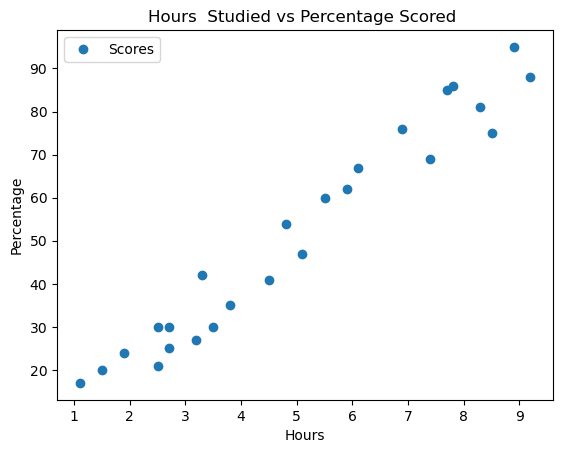

In [11]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours  Studied vs Percentage Scored ')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

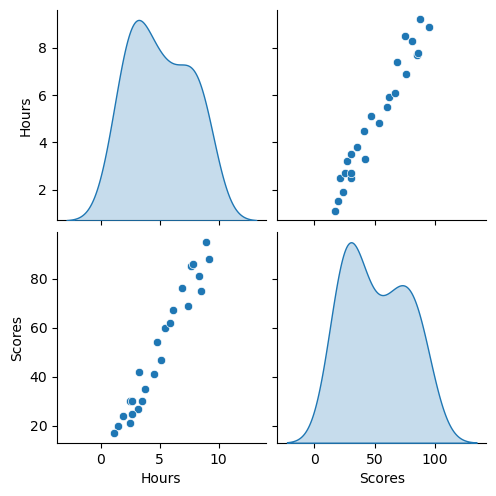

In [14]:
import seaborn as sns

sns.pairplot(data,diag_kind='kde')
plt.show()

# Preparing the Data

Divide the data into two parts-training and testing data

In [53]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [54]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [55]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [56]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [57]:
regression_model.score(X_test, y_test)

0.8933827573294114

In [58]:
# So the model explains 89% of the variability in Y using X

In [59]:
#print(X_test) # Testing data - In Hours
y_pred = regression_model.predict(X_test) # Predicting the scores
y_pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [60]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


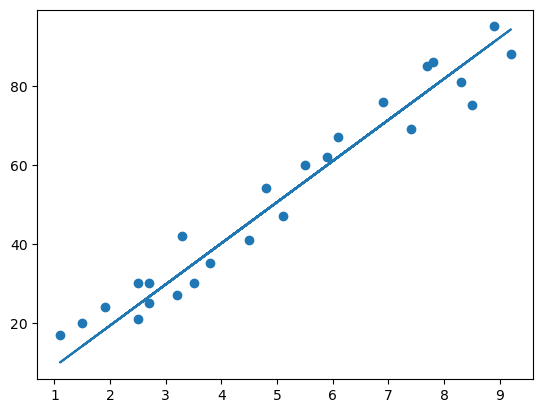

In [61]:
# Plotting the regression line
line = regression_model.coef_*X+regression_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Evaluating the Model

-It helps in evaluating how well the model performs based on its scoring

In [62]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.169048271425507


Inference-Lower the amount of error,better is the model

In [65]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse = round(np.sqrt(mse), 4)
print("Root mean squared  error: ",rmse)

Root mean squared  error:  7.4895


In [66]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

print("R2-score: ",r2)

R2-score:  0.8933827573294114


Inference: Highter the percentage ,better is the model performance